# <center><font color='red'>**Time-series forecasting: USA real estate prices**</font></center>


## <center><font color='slategray'>**1. Required libraries**</font></center>

In [192]:
# Must be installed for time series analysis capabilities.
!pip install pmdarima

# For data manipulation and analysis.
import pandas as pd

# For numerical computations, multidimensional arrays and matrix.
import numpy as np

# For visualization plots.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# For calculation of autocorrelation and partial autocorrelation functions.
from statsmodels.tsa.stattools import acf, pacf

# For displaying autocorrelation.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For working with dates and times.
from datetime import datetime

# For subtract time from a date or time.
from datetime import timedelta

# For conducting statistical tests, and statistical data exploration.
import statsmodels.api as sm

# For Box-Cox transformation.
from scipy.stats import boxcox

# For creating a Quantile-Quantile plot.
from statsmodels.graphics.gofplots import qqplot

# For performing the Augmented Dickey-Fuller (ADF) test.
from statsmodels.tsa.stattools import adfuller

# For searching the best parameters with auto-arima.
from pmdarima import auto_arima

# For performing Holt-Winters forecasting.
from statsmodels.tsa.api import ExponentialSmoothing

# For making SARIMAX and ARIMA models.
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# For calculating errors.
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Saving model objects.
import joblib

# For suppressing any warning messages.
import warnings
warnings.filterwarnings("ignore")

## <center><font color='slategray'>**2. Data analysis and preprocessing**</font></center>

In [193]:
# Reading the data.
raw_data = pd.read_csv('realtor-data.zip.csv')
print(f'Shape of data: {raw_data.shape}\n')
raw_data.head(20)

Shape of data: (904966, 10)



,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [194]:
# Extracting data only from Adjunta city.
extracted_data = raw_data.loc[raw_data.city=='Adjuntas']
extracted_data.head(20)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
1288,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1336,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
1542,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1588,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
1640,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1663,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
1833,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1839,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0


In [195]:
# Rename a column 'prev_sold_date' to 'Date'.
raw_data.rename({'prev_sold_date': 'Date'}, axis=1, inplace=True)
raw_data

,status,bed,bath,acre_lot,city,state,zip_code,house_size,Date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0


In [196]:
# Info about the raw data.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      904966 non-null  object 
 1   bed         775126 non-null  float64
 2   bath        791082 non-null  float64
 3   acre_lot    638324 non-null  float64
 4   city        904894 non-null  object 
 5   state       904966 non-null  object 
 6   zip_code    904762 non-null  float64
 7   house_size  612080 non-null  float64
 8   Date        445865 non-null  object 
 9   price       904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


### <center><font color='slategray'>**2.1. Removing columns and missing values**</font></center>

In [197]:
# Rename 'raw_data' into 'removed_data'.

# Removing columns which not need to further analysis.
removed_data = raw_data.drop(['status', 'bed', 	'bath', 'acre_lot',
                              'city', 'state', 'zip_code', 'house_size'],
                             axis=1)
removed_data

,Date,price
0,NaN,105000.0
1,NaN,80000.0
2,NaN,67000.0
3,NaN,145000.0
4,NaN,65000.0
...,...,...
904961,2021-08-13,359000.0
904962,NaN,299000.0
904963,NaN,120000.0
904964,NaN,449000.0


In [198]:
removed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    445865 non-null  object 
 1   price   904895 non-null  float64
dtypes: float64(1), object(1)
memory usage: 13.8+ MB


In [199]:
# Checking duplicates in the data.
print('Number of duplicates :', removed_data.duplicated().sum())

Number of duplicates : 842107


In [200]:
# Removing all duplicates in the data.
removed_data.drop_duplicates(inplace=True)

# Checking duplicates after removed.
print('Number of duplicates after removed:', removed_data.duplicated().sum())

Number of duplicates after removed: 0


In [201]:
# Checking a missing data.
print('Columns and missing data:')
removed_data.isnull().sum()

Columns and missing data:


Date     5557
price       1
dtype: int64

In [202]:
# Removing missing values from column 'Date'.
removed_data.dropna(subset=['Date', 'price'], inplace=True)
removed_data.isnull().sum()

Date     0
price    0
dtype: int64

In [203]:
# Checking duplicates in the data.
print('Number of duplicates:', removed_data.duplicated().sum())

Number of duplicates: 0


In [204]:
removed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57302 entries, 684 to 904961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    57302 non-null  object 
 1   price   57302 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


### <center><font color='slategray'>**2.2. Converting the 'Date' column into a datetime format**</font></center>

In [205]:
# By default the "Date" column was in string (object) format,
# we need to convert it into datetime format.

# Change the 'Date' column to datetime format.
removed_data.Date = pd.to_datetime(removed_data.Date, format='%Y-%m-%d')

removed_data

,Date,price
684,2020-02-28,76900.0
829,2019-06-28,110000.0
4608,2021-09-15,159000.0
5163,2021-03-15,380000.0
10344,2013-10-11,950000.0
...,...,...
904956,2018-08-01,259000.0
904957,2014-04-16,219900.0
904959,2022-04-01,265000.0
904960,2021-08-16,399000.0


In [206]:
removed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57302 entries, 684 to 904961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    57302 non-null  datetime64[ns]
 1   price   57302 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 MB


### <center><font color='slategray'>**2.3. Splitting the 'Date' column into a year, a month and a day**</font></center>

In [207]:
# Extract the year, month and day separately.
removed_data['year'] = removed_data.Date.dt.year
removed_data['month'] = removed_data.Date.dt.month
removed_data['day'] = removed_data.Date.dt.day
removed_data


,Date,price,year,month,day
684,2020-02-28,76900.0,2020,2,28
829,2019-06-28,110000.0,2019,6,28
4608,2021-09-15,159000.0,2021,9,15
5163,2021-03-15,380000.0,2021,3,15
10344,2013-10-11,950000.0,2013,10,11
...,...,...,...,...,...
904956,2018-08-01,259000.0,2018,8,1
904957,2014-04-16,219900.0,2014,4,16
904959,2022-04-01,265000.0,2022,4,1
904960,2021-08-16,399000.0,2021,8,16


In [208]:
print(removed_data.columns)

Index(['Date', 'price', 'year', 'month', 'day'], dtype='object')


### <center><font color='slategray'>**2.4. Index definition**</font></center>

In [209]:
# Rename 'removed_data' into 'index_data'.

# Making 'Date' as an index column.
index_data = removed_data.set_index('Date')
print('"Date" is an index now')
print('======================= \n')
index_data

"Date" is an index now



,price,year,month,day
Date,,,,
2020-02-28,76900.0,2020,2,28
2019-06-28,110000.0,2019,6,28
2021-09-15,159000.0,2021,9,15
2021-03-15,380000.0,2021,3,15
2013-10-11,950000.0,2013,10,11
...,...,...,...,...
2018-08-01,259000.0,2018,8,1
2014-04-16,219900.0,2014,4,16
2022-04-01,265000.0,2022,4,1


In [210]:
index_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57302 entries, 2020-02-28 to 2021-08-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   57302 non-null  float64
 1   year    57302 non-null  int64  
 2   month   57302 non-null  int64  
 3   day     57302 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


In [211]:
# Rename 'index_data' into 'main_data'.

# Sorting the 'Date' index column.
main_data = index_data.sort_index()
print(f'Shape of data: {main_data.shape}\n')
main_data

Shape of data: (57302, 4)



,price,year,month,day
Date,,,,
1901-01-01,339000.0,1901,1,1
1910-01-29,269000.0,1910,1,29
1952-12-21,649900.0,1952,12,21
1953-01-02,145000.0,1953,1,2
1954-11-19,339900.0,1954,11,19
...,...,...,...,...
2022-12-30,1899000.0,2022,12,30
2022-12-31,11500000.0,2022,12,31
2022-12-31,2595000.0,2022,12,31


In [212]:
# Main the data info.
main_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57302 entries, 1901-01-01 to 2023-03-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   57302 non-null  float64
 1   year    57302 non-null  int64  
 2   month   57302 non-null  int64  
 3   day     57302 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 MB


<font  size='4'><font color='olive'>For further analysis time-series data I have only 4 columns,   
and index column – 'Date' from 1901-01-01 till 2022-03-23</font>

## <center><font color='slategray'>**3. Data visualisation**</font></center>

                price  year  month  day
Date                                   
1901-01-01   339000.0  1901      1    1
1910-01-29   269000.0  1910      1   29
1952-12-21   649900.0  1952     12   21
1953-01-02   145000.0  1953      1    2
1954-11-19   339900.0  1954     11   19
1955-02-24   527900.0  1955      2   24
1955-03-05   199000.0  1955      3    5
1956-10-25   250000.0  1956     10   25
1957-09-26   749900.0  1957      9   26
1960-06-28  1199000.0  1960      6   28 



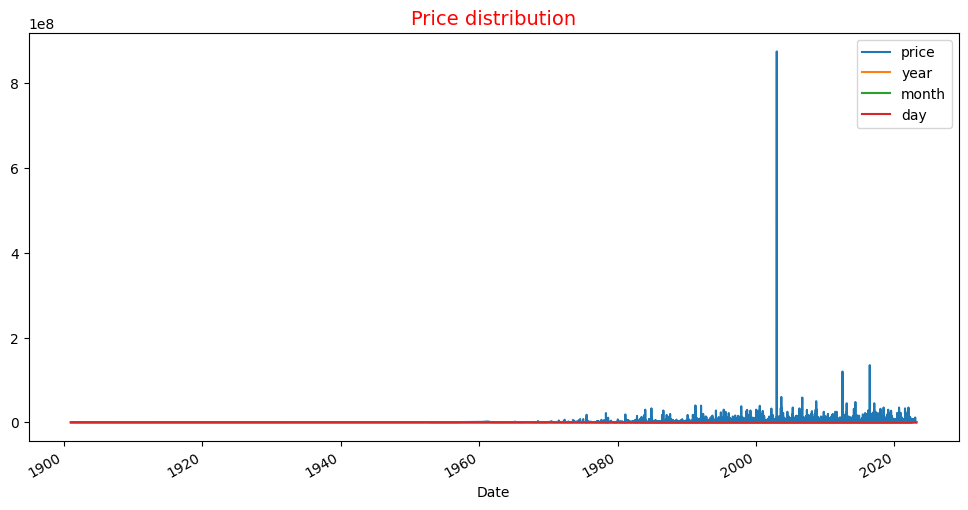

In [213]:
# Get the first 10 rows of the data.
print(main_data.head(10), '\n')

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Display of price distribution.
main_data.plot()
plt.title('Price distribution', size=14, color='r')
plt.show()

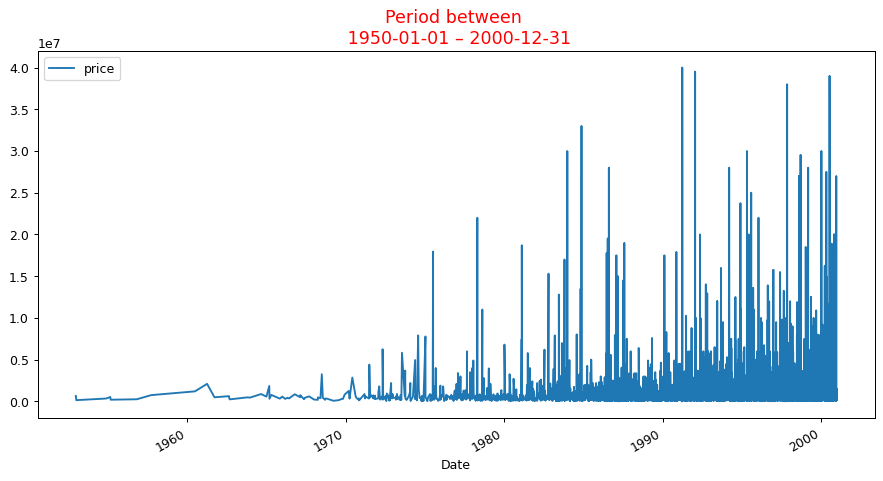

In [214]:
# Displaying of time series price for a certain period.

# Displaying of a certain period.
new_sample_df = main_data.loc['1950-01-01':'2000-12-31', ['price']]

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':90})
new_sample_df.plot()
plt.title('Period between \n 1950-01-01 – 2000-12-31', size=14, color='r')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

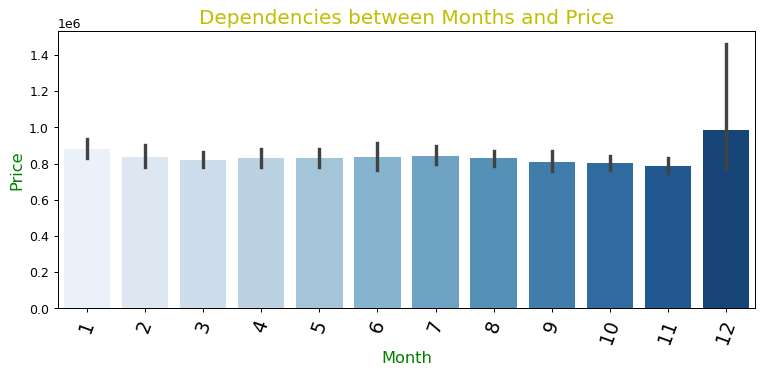

In [215]:
# Displaying of dependencies between months and price.

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':90})

# Making subplot figure.
plt.figure(figsize=(10, 4))
sns.barplot(data=main_data, x='month', y='price',  palette='Blues')
plt.title('Dependencies between Months and Price', fontsize=16, color='y')
plt.xlabel('Month', fontsize=13, color='g')
plt.ylabel('Price', fontsize=13, color='g')
plt.xticks(rotation=70, fontsize=15)

<font  size='4'><font color='daolive'>As we can see above, the most popular month for salling is 12 (December)</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

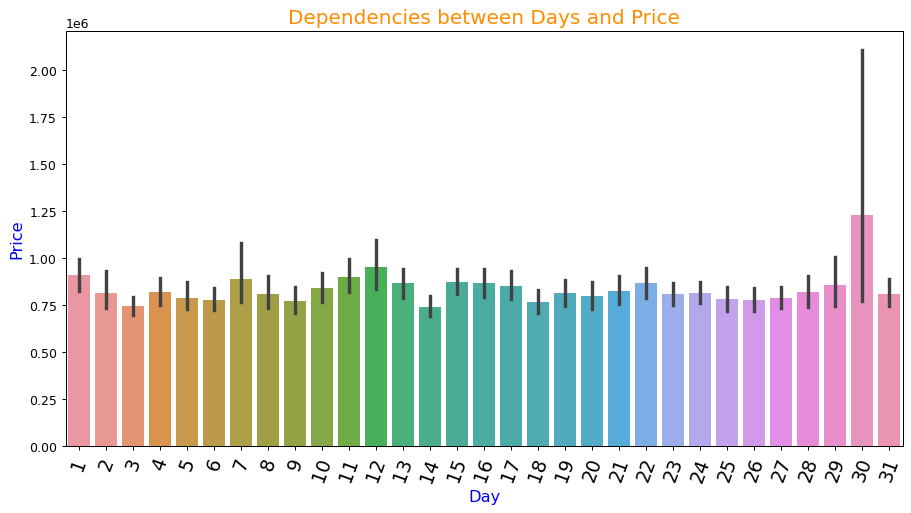

In [216]:
# Displaying of dependencies between days and price.

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':90})

# Making subplot figure.
sns.barplot(data=main_data, x='day', y='price')
plt.title('Dependencies between Days and Price', fontsize=16, color='darkorange')
plt.xlabel('Day', fontsize=13, color='b')
plt.ylabel('Price', fontsize=13, color='b')
plt.xticks(rotation=70, fontsize=15)

<font  size='4'><font color='daolive'>As we can see above, the most popular day for salling is 30.</font>

### <center><font color='slategray'>**3.1. Resampling and interpolating data**</font></center>

In [217]:
# Resampling the data on yearly frequency.
yearly_resampled_data = main_data.resample('Y').mean()

# Displaying the min price of the each year.
print('--- Yearly frequency ---\n')
print(yearly_resampled_data.to_string())

--- Yearly frequency ---

                   price    year      month        day
Date                                                  
1901-12-31  3.390000e+05  1901.0   1.000000   1.000000
1902-12-31           NaN     NaN        NaN        NaN
1903-12-31           NaN     NaN        NaN        NaN
1904-12-31           NaN     NaN        NaN        NaN
1905-12-31           NaN     NaN        NaN        NaN
1906-12-31           NaN     NaN        NaN        NaN
1907-12-31           NaN     NaN        NaN        NaN
1908-12-31           NaN     NaN        NaN        NaN
1909-12-31           NaN     NaN        NaN        NaN
1910-12-31  2.690000e+05  1910.0   1.000000  29.000000
1911-12-31           NaN     NaN        NaN        NaN
1912-12-31           NaN     NaN        NaN        NaN
1913-12-31           NaN     NaN        NaN        NaN
1914-12-31           NaN     NaN        NaN        NaN
1915-12-31           NaN     NaN        NaN        NaN
1916-12-31           NaN     NaN       

<font  size='4'><font color='blue'>As we can see, the dataset has the NaN values.  
For filling them I will use **the interpolate function** with *Fill-Backward Method*.    
Why *Fill-Backward Method*,  because I have enough future observations.    
This method fills missing values with the next observed value. Similar to fill-forward,    
it assumes that the next available value is a suitable estimate for the missing data    
until the subsequent observation is recorded.  
**The interpolate function** works by drawing a straight line between  
two known data points and estimating the missing values along that line.</font>

In [218]:
# Use interpolate function with method linear to fill the NaN values.

# Using fill-backward method to handle missing values
yearly_resampled_data.fillna(method='bfill', inplace=True)

# Printing the linear interpolated values with average prices.
print('--- Yearly frequency after the interpolate function ---\n')
print(yearly_resampled_data.to_string())

--- Yearly frequency after the interpolate function ---

                   price    year      month        day
Date                                                  
1901-12-31  3.390000e+05  1901.0   1.000000   1.000000
1902-12-31  2.690000e+05  1910.0   1.000000  29.000000
1903-12-31  2.690000e+05  1910.0   1.000000  29.000000
1904-12-31  2.690000e+05  1910.0   1.000000  29.000000
1905-12-31  2.690000e+05  1910.0   1.000000  29.000000
1906-12-31  2.690000e+05  1910.0   1.000000  29.000000
1907-12-31  2.690000e+05  1910.0   1.000000  29.000000
1908-12-31  2.690000e+05  1910.0   1.000000  29.000000
1909-12-31  2.690000e+05  1910.0   1.000000  29.000000
1910-12-31  2.690000e+05  1910.0   1.000000  29.000000
1911-12-31  6.499000e+05  1952.0  12.000000  21.000000
1912-12-31  6.499000e+05  1952.0  12.000000  21.000000
1913-12-31  6.499000e+05  1952.0  12.000000  21.000000
1914-12-31  6.499000e+05  1952.0  12.000000  21.000000
1915-12-31  6.499000e+05  1952.0  12.000000  21.000000
1916-12-

In [219]:
yearly_resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1901-12-31 to 2023-12-31
Freq: A-DEC
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   123 non-null    float64
 1   year    123 non-null    float64
 2   month   123 non-null    float64
 3   day     123 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<font  size='4'><font color='blue'>As we can see, all the NaN values now
has been filled.</font>

### <center><font color='slategray'>**3.2. Statistics, characteristics, and evaluation of the distribution of current data**</font></center>

count    1.230000e+02
mean     7.126840e+05
std      2.514666e+05
min      1.450000e+05
25%      6.499000e+05
50%      6.499000e+05
75%      8.254345e+05
max      1.509536e+06
Name: price, dtype: float64


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>]], dtype=object)

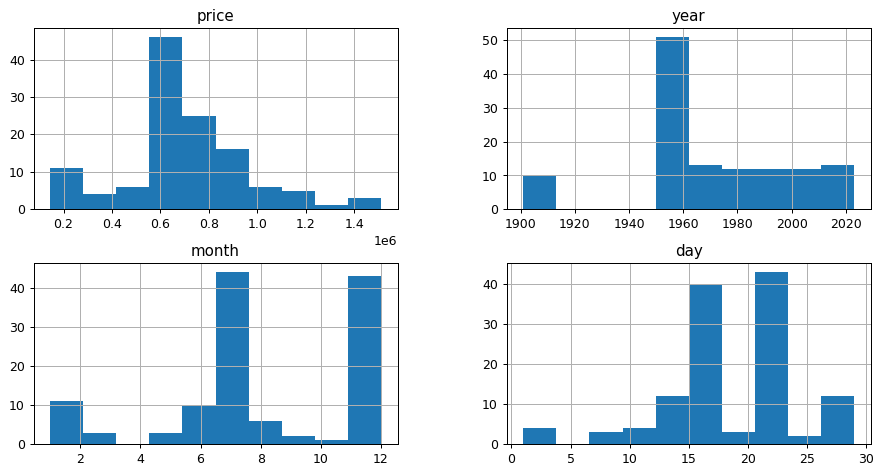

In [220]:
# The basic statistics and characteristics of the data.
get_describe_1 = yearly_resampled_data['price'].describe()
print(get_describe_1)

# Displaying the histogram.
yearly_resampled_data.hist()

<font  size='4'><font color='blue'>I have got different Skewed Distribution.</font>

In [221]:
# Coefficient of Variation (CV).

# Calculating the ratio of the standard deviation to the mean.
print(f'CV = {get_describe_1["std"] / get_describe_1["mean"]:.3f}')

CV = 0.353


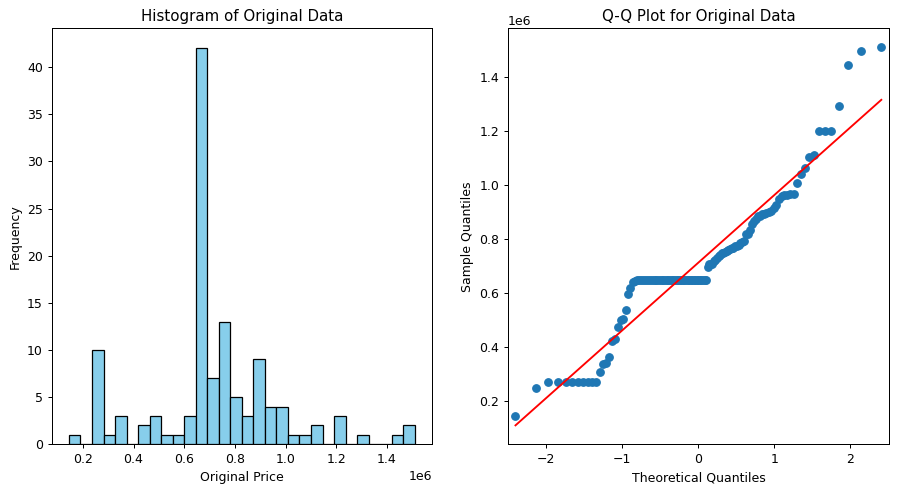

In [222]:
# Making the histogram and Q-Q plot for Original Data.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=90)

# Create a histogram plot.
ax1.hist(yearly_resampled_data['price'], bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Histogram of Original Data')
ax1.set_xlabel('Original Price')
ax1.set_ylabel('Frequency')

# Create a Q-Q plot for the original data.
qqplot(yearly_resampled_data['price'], line='s', ax=ax2)
ax2.set_title('Q-Q Plot for Original Data')

# Display the subplots.
plt.show()

In [223]:
# Box-Cox Transformation.

# Extract the price data from my DataFrame.
price_data = yearly_resampled_data['price']

# Apply the Box-Cox transformation to the price data.
transformed_data, lambda_val = boxcox(price_data)

# Create a DataFrame with the transformed data.
transformed_df = pd.DataFrame(transformed_data,
                              index=yearly_resampled_data.index,
                              columns=['transformed_price'])

# Display the transformed data.
print(transformed_df)

            transformed_price
Date                         
1901-12-31       15030.795852
1902-12-31       12693.487151
1903-12-31       12693.487151
1904-12-31       12693.487151
1905-12-31       12693.487151
...                       ...
2019-12-31       26171.479399
2020-12-31       25722.413981
2021-12-31       26938.164414
2022-12-31       31332.796422
2023-12-31       27870.853624

[123 rows x 1 columns]


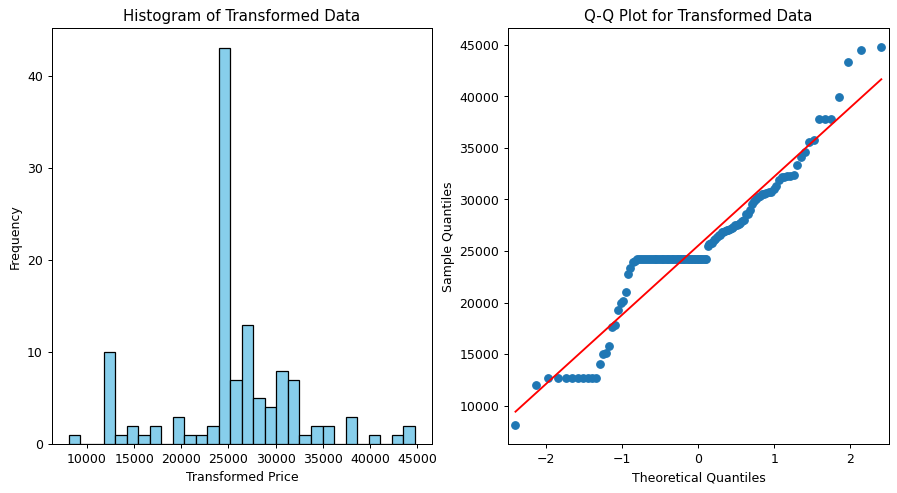

In [224]:
# Making the histogram and Q-Q plot for Transformed Data.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=90)

# Create a histogram plot.
ax1.hist(transformed_df['transformed_price'],
         bins=30,
         color='skyblue',
         edgecolor='black')

ax1.set_title('Histogram of Transformed Data')
ax1.set_xlabel('Transformed Price')
ax1.set_ylabel('Frequency')

# Create a Q-Q plot for the transformed data.
qqplot(transformed_df['transformed_price'], line='s', ax=ax2)
ax2.set_title('Q-Q Plot for Transformed Data')

# Display the subplots.
plt.show()

### <center><font color='slategray'>**3.3. Time-Series data visualization**</font></center>

In [272]:
# I will use yearly frequency data after resampling and interpolation.

# Period for displaying.
start_date = datetime(1901,12,31)
end_date = datetime(2023,12,31)

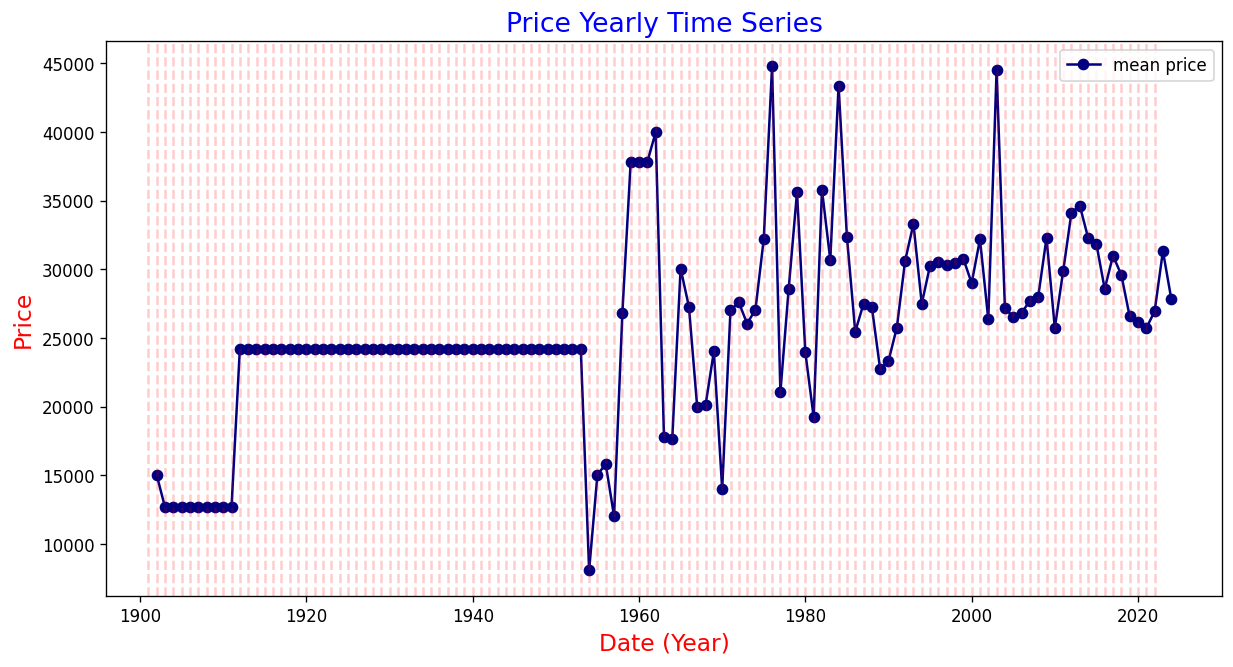

In [273]:
# Plot the yearly price.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':120})

# Making a plot of the figure.
plt.plot(transformed_df['transformed_price'], "o-", color="navy", label='mean price')
plt.title('Price Yearly Time Series', fontsize=16, color='blue')
plt.xlabel('Date (Year)', fontsize=14, color='red')
plt.ylabel('Price', fontsize=14, color='red')
plt.legend(loc='best')

# Iteration from start to end of all years.
for year in range(start_date.year, end_date.year):
   plt.axvline(pd.to_datetime(str(year)), color='r', linestyle='--', alpha=0.2)

<font  size='4'><font color='blue'>For further analysis, I will reduce number of data from 1994-12-31 till 2023-12-31.</font>

In [274]:
# New period for displaying.
start_date = datetime(1994,12,31)
end_date = datetime(2023,12,31)

# Number of data.
lim_data = transformed_df['transformed_price'][start_date:end_date]
print('Number of rows with data:', len(lim_data))

Number of rows with data: 30


In [275]:
# Dispalaying a table with limited data.
lim_data

Date
1994-12-31    30277.769030
1995-12-31    30528.273519
1996-12-31    30327.676492
1997-12-31    30492.214158
1998-12-31    30773.958278
1999-12-31    28999.531248
2000-12-31    32183.509305
2001-12-31    26361.460419
2002-12-31    44501.754430
2003-12-31    27173.119045
2004-12-31    26524.815094
2005-12-31    26808.370840
2006-12-31    27727.317223
2007-12-31    27995.412939
2008-12-31    32275.721561
2009-12-31    25740.547301
2010-12-31    29846.696450
2011-12-31    34119.880609
2012-12-31    34637.072028
2013-12-31    32304.553472
2014-12-31    31844.420499
2015-12-31    28581.980097
2016-12-31    31001.052376
2017-12-31    29583.429608
2018-12-31    26586.410332
2019-12-31    26171.479399
2020-12-31    25722.413981
2021-12-31    26938.164414
2022-12-31    31332.796422
2023-12-31    27870.853624
Freq: A-DEC, Name: transformed_price, dtype: float64

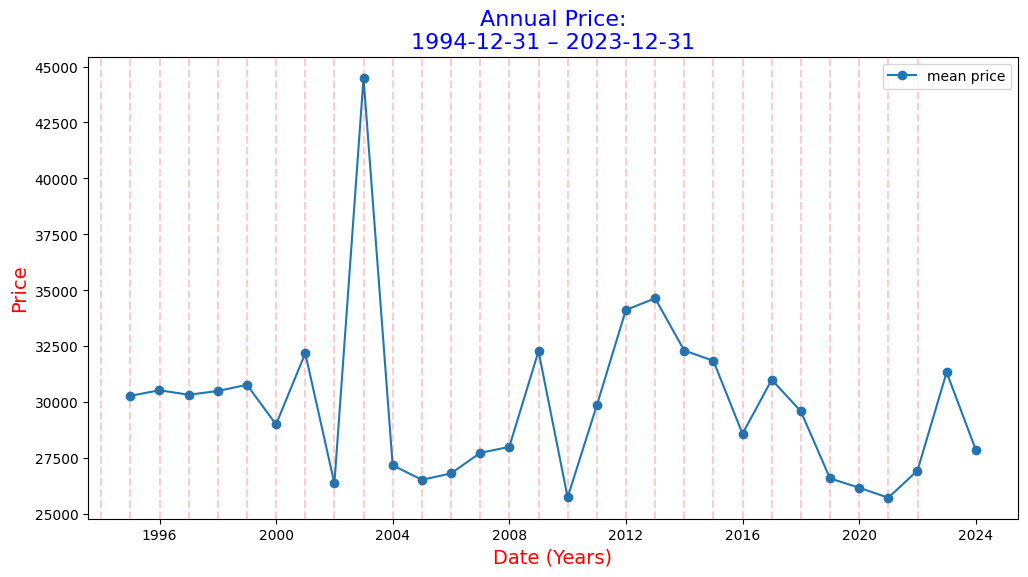

In [276]:
# Plot the yearly price.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Making a plot of the figure.
plt.plot(lim_data, "o-", label='mean price')
plt.title('Annual Price:\n1994-12-31 – 2023-12-31', fontsize=16, color='blue')
plt.xlabel('Date (Years)', fontsize=14, color='red')
plt.ylabel("Price", fontsize=14, color='red')
plt.legend(loc='best')

# Iteration from start to end of all years.
for year in range(start_date.year, end_date.year):
   plt.axvline(pd.to_datetime(str(year)), color='r', linestyle='--', alpha=0.2)

<font  size='4'><font color='blue'>There doesn't seem to be define upwards or downwards trend.</font>

<font  size='3'><font color='green'>Now I will check stationarity or  non-stationarity of the series by:   

1.   Advanced test methodologies like **Dickey Fuller test** as we do below.</font>

## <center><font color='slategray'>**4. **The Dickey-Fuller Test****</font></center>

In [277]:
# Function to check stationary or non-stationary series.
def check_stationarity(time_series):
    # Perform the Dickey-Fuller Test.
    DF_test = adfuller(time_series.dropna(), autolag='AIC')

    print('Dickey-Fuller Test:\n')

    print(f'1. ADF: {DF_test[0]:.3f}')
    print(f'2. P-Value: {DF_test[1]:.3f}')
    print(f'3. Num Of Lags: {DF_test[2]:.3f}')
    print('4. Num Of Observations Used For ADF Regression and Critical Values Calculation:', DF_test[3])
    print('5. Critical Values:')

    for key, val in DF_test[4].items():
        print('\t', key, ':', f'{val:.3f}')

    # Determining whether stationary or non-stationary.
    if DF_test[1] > 0.05:
        print('\n\033[1mThe series is non-stationary\033[0m!')
    else:
        print('\n\033[1mThe series is stationary\033[0m!')

# Output result.
check_stationarity(lim_data)

Dickey-Fuller Test:

1. ADF: -2.608
2. P-Value: 0.091
3. Num Of Lags: 6.000
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 23
5. Critical Values:
	 1% : -3.753
	 5% : -2.998
	 10% : -2.639

The series is non-stationary!


<font  size='4'><font color='blue'>Based on these results, I can conclude the following:
<br><br>1. The ADF statistic (-2.608) is more positive (less negative and closer to zero) than the 1% critical value (-3.753).   
This indicates that, at the 1% significance level, the ADF statistic is not sufficiently    
negative to support the rejection of the null hypothesis of **non-stationarity**.
<br><br>2. The p-value (0.091). A high P-value (greater than 0.05) suggests    
that  I do not have enough evidence to reject the null hypothesis of **non-stationarity**.    
In other words, the data does not exhibit strong indications of stationarity.</font>

<font  size='4'><font color='navy'>In the context of the Dickey-Fuller Test for stationarity:


1. **Null Hypothesis** (H0): The time series data is **non-stationary**.
2. **Alternative Hypothesis** (H1): The time series data is **stationary**.  

So, when I have a high P-value (e.g., p > 0.05), it suggests that I do not have enough evidence    
to conclude that the time series is stationary, and I fail to reject the null hypothesis,    
which implies that the data is non-stationary.</font>

<font  size='4'><font color='red'>Therefore, based on ***the Dickey-Fuller Test*** results,    
I have evidence to conclude that the time series data is more likely to be **non-stationarity**.


<font  size='4'><font color='darkred'>NOTE: For the following analysis I have to prepare my data as a stationary time series.</font>

## <center><font color='slategray'>**5. Making non-stationary time series to stationary**</font></center>


### <center><font color='slategray'>**5.1. First-Order Differenced Time Series**</font></center>

In [278]:
print('Data before First-Order:\n')
lim_data

Data before First-Order:



Date
1994-12-31    30277.769030
1995-12-31    30528.273519
1996-12-31    30327.676492
1997-12-31    30492.214158
1998-12-31    30773.958278
1999-12-31    28999.531248
2000-12-31    32183.509305
2001-12-31    26361.460419
2002-12-31    44501.754430
2003-12-31    27173.119045
2004-12-31    26524.815094
2005-12-31    26808.370840
2006-12-31    27727.317223
2007-12-31    27995.412939
2008-12-31    32275.721561
2009-12-31    25740.547301
2010-12-31    29846.696450
2011-12-31    34119.880609
2012-12-31    34637.072028
2013-12-31    32304.553472
2014-12-31    31844.420499
2015-12-31    28581.980097
2016-12-31    31001.052376
2017-12-31    29583.429608
2018-12-31    26586.410332
2019-12-31    26171.479399
2020-12-31    25722.413981
2021-12-31    26938.164414
2022-12-31    31332.796422
2023-12-31    27870.853624
Freq: A-DEC, Name: transformed_price, dtype: float64

In [279]:
'''Rename 'lim_data' to 'first_diff', and transform non-stationary data
into stationary data by subtracting each data point from its previous data point'''

first_diff = lim_data.diff().dropna()

print('Data after First-Order:\n')
first_diff

Data after First-Order:



Date
1995-12-31      250.504490
1996-12-31     -200.597028
1997-12-31      164.537666
1998-12-31      281.744120
1999-12-31    -1774.427030
2000-12-31     3183.978058
2001-12-31    -5822.048886
2002-12-31    18140.294010
2003-12-31   -17328.635385
2004-12-31     -648.303951
2005-12-31      283.555746
2006-12-31      918.946384
2007-12-31      268.095716
2008-12-31     4280.308622
2009-12-31    -6535.174260
2010-12-31     4106.149149
2011-12-31     4273.184158
2012-12-31      517.191420
2013-12-31    -2332.518557
2014-12-31     -460.132973
2015-12-31    -3262.440402
2016-12-31     2419.072279
2017-12-31    -1417.622768
2018-12-31    -2997.019276
2019-12-31     -414.930933
2020-12-31     -449.065417
2021-12-31     1215.750433
2022-12-31     4394.632008
2023-12-31    -3461.942798
Freq: A-DEC, Name: transformed_price, dtype: float64

<font  size='4'><font color='blue'>**The first-order difference** is created by subtracting each data point    
from its previous data point. It helps make the time series more stationary.    
After the differencing technique we can see there are both positive and negative differences,    
suggesting fluctuations. Time series shows the changes in "price" from year to year.</font>

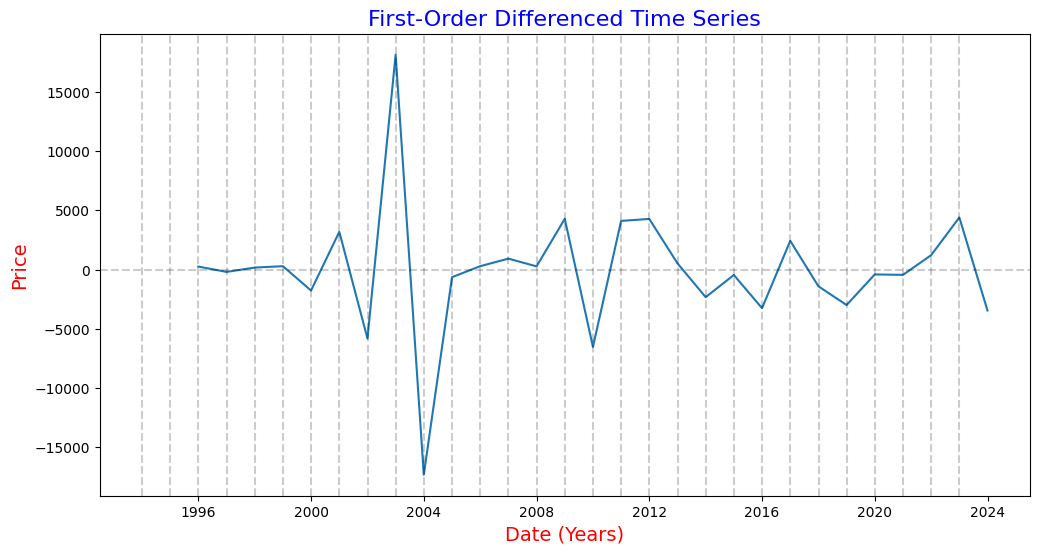

In [280]:
# Displaying First-Order Differenced Time Series.

plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

plt.plot(first_diff)

plt.title('First-Order Differenced Time Series', fontsize=16, color='blue')
plt.xlabel('Date (Years)', fontsize=14, color='red')
plt.ylabel('Price', fontsize=14, color='red')

for year in range(start_date.year, end_date.year + 1):
   plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

### <center><font color='slategray'>**5.2. The Dickey Fuller test after First-Order Differenced Time Series**</font></center>

In [281]:
# Dickey-Fuller Test.

# Function to check stationary or non-stationary series.
def check_stationarity(time_series):
    # Perform the Dickey-Fuller Test.
    DF_test = adfuller(time_series, autolag='AIC')
    print('Dickey-Fuller Test:\n')

    print(f'1. ADF: {DF_test[0]:.3f}')
    print(f'2. P-Value: {DF_test[1]:.3f}')
    print(f'3. Num Of Lags: {DF_test[2]:.3f}')
    print('4. Num Of Observations Used For ADF Regression and Critical Values Calculation:', DF_test[3])
    print('5. Critical Values:')

    for key, val in DF_test[4].items():
        print('\t', key, ':', f'{val:.3f}')

    # Determining whether stationary or non-stationary.
    if DF_test[1] > 0.05:
        print('\n\033[1mThe series is non-stationary\033[0m!')
    else:
        print('\n\033[1mThe series is stationary\033[0m!')

# Output result.
check_stationarity(first_diff)

Dickey-Fuller Test:

1. ADF: -3.862
2. P-Value: 0.002
3. Num Of Lags: 8.000
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 20
5. Critical Values:
	 1% : -3.809
	 5% : -3.022
	 10% : -2.651

The series is stationary!


<font  size='4'><font color='blue'>Based on these results, I can conclude the following:   
<br>1. The ADF value (-3.862) is less positive (more negative) than the 1% critical value (-3.809), <br>indicating that we **cannot reject the null hypothesis** of non-stationarity at the 1% significance level.
<br>This means that the time series is **non-stationary**.    
<br>2. The p-value (0.002) is less than the commonly used significance level of 0.05.    
This supports rejecting the null hypothesis of non-stationarity for the time series.</font>

<font  size='4'><font color='navy'>In the context of the Dickey-Fuller Test for stationarity:


1. **Null Hypothesis** (H0): The time series data is **not stationary**.
2. **Alternative Hypothesis** (H1): The time series data is **stationary**.  

<font  size='4'><font color='red'>Meanwhile, based on ***the Dickey-Fuller Test*** results, the ADF value falls within the critical values for both the 5% and 10% significance levels, indicating that we can reject the null hypothesis of non-stationarity at these levels.
<br>I have evidence to suggest that **the series might be stationarity**.

### <center><font color='slategray'>**5.3. Comparison the original and stationary series**</font></center>

Original Series:
Dickey-Fuller Test:

1. ADF: -2.608
2. P-Value: 0.091
The series is non-stationary!

-----------------------------

After First-Order Differencing:
Dickey-Fuller Test:

1. ADF: -3.862
2. P-Value: 0.002
The series is stationary!


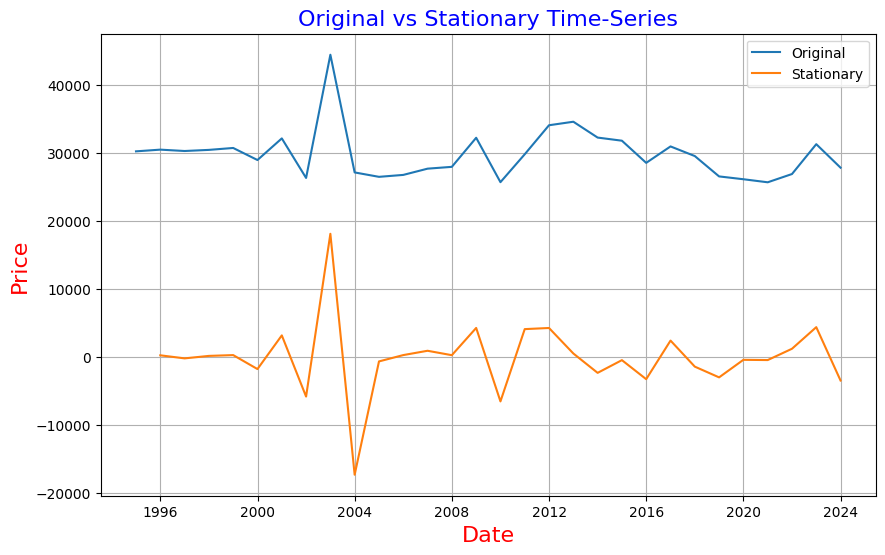

In [282]:
# Function to check stationarity using the Dickey-Fuller Test.
def check_stationarity(time_series):
    # Perform the Dickey-Fuller Test.
    DF_test = adfuller(time_series, autolag='AIC')

    # Print the test results.
    print('Dickey-Fuller Test:\n')
    print(f'1. ADF: {DF_test[0]:.3f}')
    print(f'2. P-Value: {DF_test[1]:.3f}')

    # Determining whether stationary or non-stationary.
    if DF_test[1] > 0.05:
        print('\033[1mThe series is non-stationary\033[0m!')
    else:
        print('\033[1mThe series is stationary\033[0m!')

# Check stationarity of the data.
print('Original Series:')
check_stationarity(lim_data)

print('\n-----------------------------')

# Apply differencing or other transformations as needed to make it stationary.
# Example: differencing
first_diff = lim_data.diff().dropna()
print("\nAfter First-Order Differencing:")
check_stationarity(first_diff)

# Plot the original and stationary series.
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})
plt.plot(lim_data.index, lim_data, label='Original')
plt.plot(first_diff.index, first_diff, label='Stationary')
plt.legend()
plt.xlabel('Date', fontsize=16, color='red')
plt.ylabel('Price', fontsize=16, color='red')
plt.title('Original vs Stationary Time-Series', fontsize=16, color='blue')
plt.grid(True)
plt.show()

## <center><font color='slategray'>**6. Splitting into trend, seasonality and residuals (noise component), and analyze.**</font></center>

-- Decomposition for the original data: lim_data --


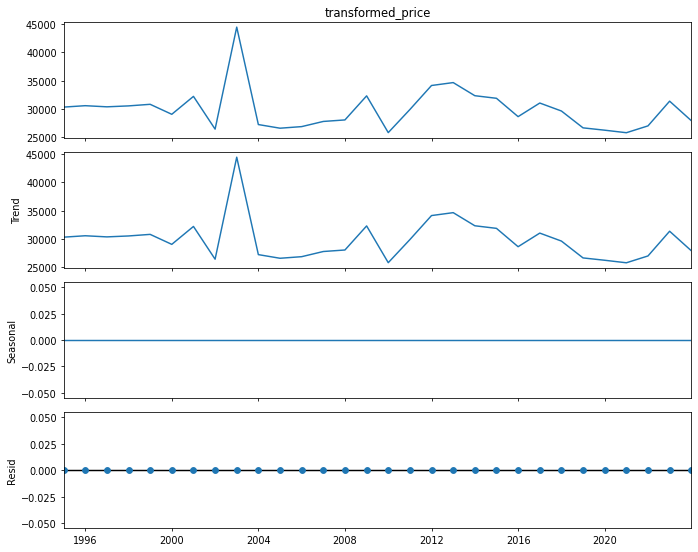

In [284]:
# Plot size.
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':70})

# Perform seasonal decomposition for original lim_data.
origin_decompose = sm.tsa.seasonal_decompose(lim_data)
print('-- Decomposition for the original data: lim_data --')
origin_decompose.plot()
plt.show()

<font  size='4'><font color='blue'>
1.   We can see that **Seasonal** is a straight line.    
It means that data doesn't exhibit a repeating pattern or seasonality over time.    
Also **Seasonality** is not a significant factor in my time series, and the data behaves    
more as a trend with little to no regular seasonal fluctuations.   
2. A straight-line **Residual** component indicates that there is minimal leftover variation    
or noise in the data after accounting for the trend and seasonal components.    
A straight-line residual component is a positive sign.</font>

-- Decomposition for the first_diff data --


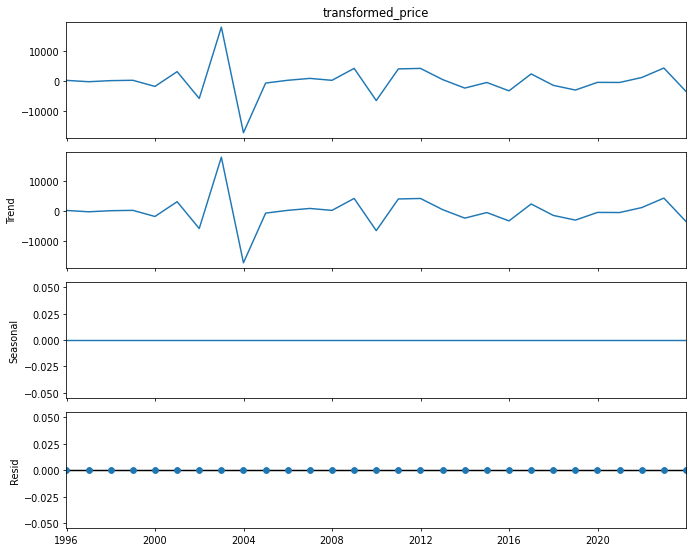

In [285]:
# Plot size.
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':70})

# Perform seasonal decomposition for First Diff Time Series.
diff_decompose = sm.tsa.seasonal_decompose(first_diff)
print('-- Decomposition for the first_diff data --')
diff_decompose.plot()
plt.show()

<font  size='4'><font color='red'>We can see that changes occur only in the first two graphs.    
However, it's essential to conduct further analysis of the residuals to ensure    
that there are no significant patterns or autocorrelation left in them.    
For this analysis I will use **autocorrelation function (ACF)**    
and **partial autocorrelation function (PACF)** of the residuals to check for any remaining structure. </font>

## <center><font color='slategray'>**7. ACF and PACF analysis**</font></center>

In [286]:
# Making Autocorrelation (acf) correlation.
acf_corr = acf(first_diff)
print('Array of Autocorrelation:')
print(acf_corr)

# Making Partial (pacf) correlation.
pacf_corr = pacf(first_diff, nlags=3)
print('\nArray of Partial correlation:')
print(pacf_corr)

Array of Autocorrelation:
[ 1.         -0.57295131  0.16052268 -0.11556584  0.04327729 -0.06939894
  0.2571622  -0.33640007  0.06638409  0.02079     0.06654123 -0.00902021
  0.05247928 -0.16725166  0.15587443]

Array of Partial correlation:
[ 1.         -0.59341386 -0.27741604 -0.27228615]


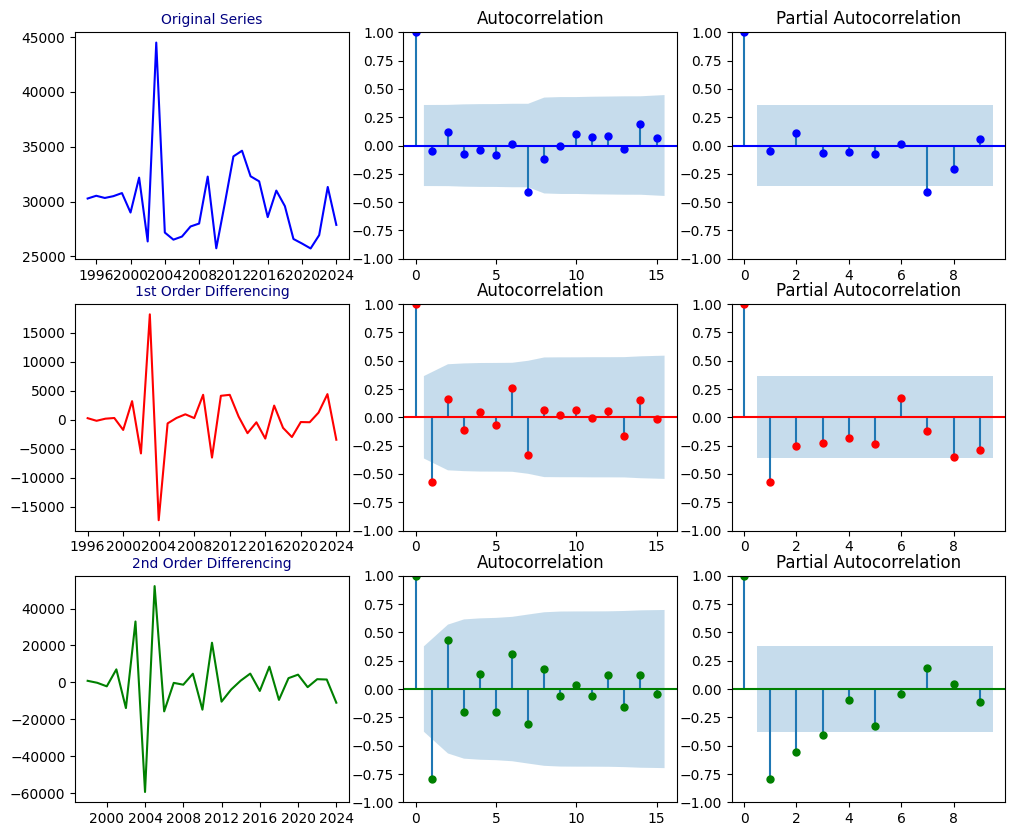

In [287]:
# Plot size.
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':100})

# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(lim_data, color='b')
axes[0, 0].set_title('Original Series', color='navy', size=10)
plot_acf(lim_data, ax=axes[0, 1], color='b')
plot_pacf(lim_data, ax=axes[0, 2], lags=9, color='b')

# 1st Differencing
axes[1, 0].plot(first_diff, color='r')
axes[1, 0].set_title('1st Order Differencing', color='navy', size=10)
plot_acf(first_diff.dropna(), ax=axes[1, 1],  color='r')
plot_pacf(first_diff.dropna(), ax=axes[1, 2], lags=9, color='r')

# 2nd Differencing
axes[2, 0].plot(first_diff.diff().diff(), color='green')
axes[2, 0].set_title('2nd Order Differencing', color='navy', size=10)
plot_acf(first_diff.diff().diff().dropna(), ax=axes[2, 1], color='green')
plot_pacf(first_diff.diff().diff().dropna(), ax=axes[2, 2], lags=9, color='green')

plt.show()

<font  size='4'><font color='blue'>**Autocorrelation** measures the linear relationship between a time series and    
its lagged values. In other words, it quantifies how correlated a data point    
is with the data points that are a certain number of time periods behind it.    
*Interpretation*:</font>


<font  size='4'><font color='navy'>
1. Autocorrelation ranges from -1 to 1. **A positive autocorrelation** value (close to indicates    
a positive linear relationship, meaning that as one data point increases,    
the lagged data points also tend to increase.
2. **A negative autocorrelation** value (close to -1) indicates a negative linear relationship,    
meaning that as one data point increases, the lagged data points tend to decrease.
3. A value **close to 0** indicates little to no linear relationship, suggesting that    
there is no consistent pattern of correlation with lagged values.</font>

<font  size='4'><font color='blue'>NOTE: **Autocorrelation** examines how a variable is related to its past values in a time series.</font>

<font  size='3'><font color='red'>Each stick in the plot corresponds to lags starting from 0 (which has the maximum    
correlation of 1 as it is correlation of a time step value with itself ).</font>

<font  size='4'><font color='blue'>**Partial correlation** measures the relationship between two variables while controlling    
for the influence of one or more additional variables. It assesses the direct association    
between two variables after removing the effects of the other variables.    
*Interpretation*:</font>

<font  size='4'><font color='navy'>
1. **A positive partial correlation** indicates that there is a positive linear relationship    
between two variables while controlling for the influence of other variables.     
In other words, when you remove the effects of the controlled variables, there's still    
a positive relationship between the two variables of interest.
2. **A negative partial correlation** indicates a negative linear relationship between    
two variables after accounting for the effects of other variables.
3. A partial correlation **close to 0** suggests that the relationship between    
the two variables of interest is weak once you account for the controlled variables.</font>

<font  size='4'><font color='blue'>NOTE: **partial correlation** examines the relationship between two variables    
while controlling for the influence of other variables.</font>

## <center><font color='slategray'>**8. Splitting into Train and Test data**</font></center>

In [288]:
# Showing all of my first_diff data to choose a period for training and testing.
print('Number of data points for observation:', len(first_diff), '\n')
print(first_diff)

Number of data points for observation: 29 

Date
1995-12-31      250.504490
1996-12-31     -200.597028
1997-12-31      164.537666
1998-12-31      281.744120
1999-12-31    -1774.427030
2000-12-31     3183.978058
2001-12-31    -5822.048886
2002-12-31    18140.294010
2003-12-31   -17328.635385
2004-12-31     -648.303951
2005-12-31      283.555746
2006-12-31      918.946384
2007-12-31      268.095716
2008-12-31     4280.308622
2009-12-31    -6535.174260
2010-12-31     4106.149149
2011-12-31     4273.184158
2012-12-31      517.191420
2013-12-31    -2332.518557
2014-12-31     -460.132973
2015-12-31    -3262.440402
2016-12-31     2419.072279
2017-12-31    -1417.622768
2018-12-31    -2997.019276
2019-12-31     -414.930933
2020-12-31     -449.065417
2021-12-31     1215.750433
2022-12-31     4394.632008
2023-12-31    -3461.942798
Freq: A-DEC, Name: transformed_price, dtype: float64


In [289]:
# This date is used as the end point for the training data.
train_end = datetime(2018,12,31)

# This date is used as the end point for the testing data.
test_end = datetime(2023,12,31)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [290]:
print('\n Train data:\n', '\n', train_data)
print('Train data points:', len(train_data))

print('\n Test data:\n', '\n', test_data)
print('Test data points:', len(test_data))


 Train data:
 
 Date
1995-12-31      250.504490
1996-12-31     -200.597028
1997-12-31      164.537666
1998-12-31      281.744120
1999-12-31    -1774.427030
2000-12-31     3183.978058
2001-12-31    -5822.048886
2002-12-31    18140.294010
2003-12-31   -17328.635385
2004-12-31     -648.303951
2005-12-31      283.555746
2006-12-31      918.946384
2007-12-31      268.095716
2008-12-31     4280.308622
2009-12-31    -6535.174260
2010-12-31     4106.149149
2011-12-31     4273.184158
2012-12-31      517.191420
2013-12-31    -2332.518557
2014-12-31     -460.132973
2015-12-31    -3262.440402
2016-12-31     2419.072279
2017-12-31    -1417.622768
2018-12-31    -2997.019276
Freq: A-DEC, Name: transformed_price, dtype: float64
Train data points: 24

 Test data:
 
 Date
2019-12-31    -414.930933
2020-12-31    -449.065417
2021-12-31    1215.750433
2022-12-31    4394.632008
2023-12-31   -3461.942798
Freq: A-DEC, Name: transformed_price, dtype: float64
Test data points: 5


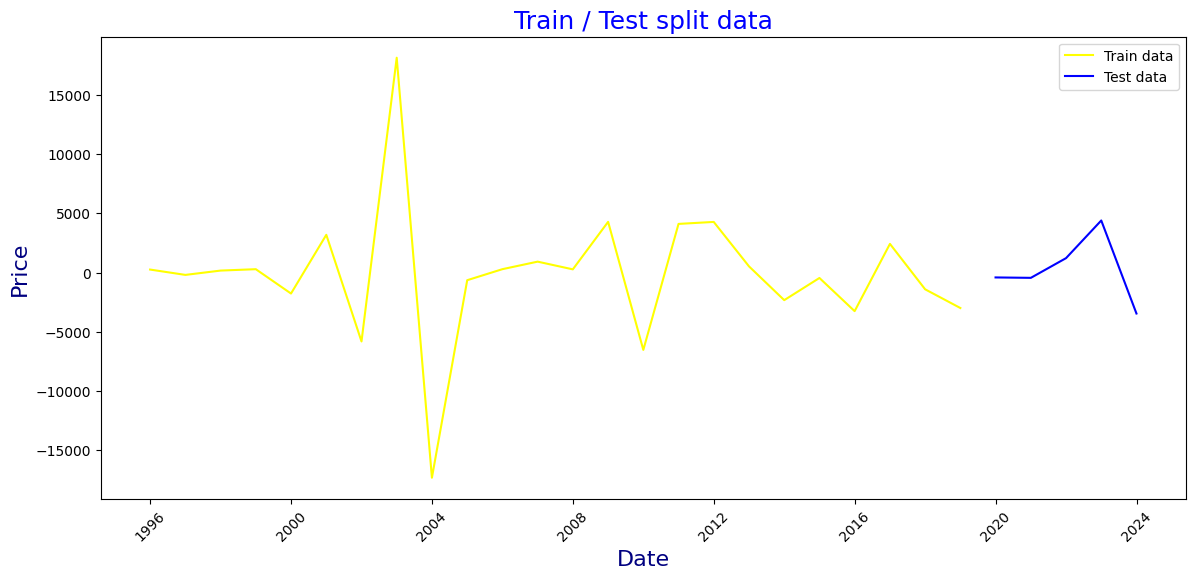

In [291]:
# Visualization Train and Test data.

# Plot size.
plt.rcParams.update({'figure.figsize':(14,6), 'figure.dpi':100})

# Making the plot.
plt.plot(train_data, color='yellow', label='Train data')
plt.plot(test_data, color='blue', label='Test data')
plt.ylabel('Price', color='navy', size=16)
plt.xlabel('Date', color='navy', size=16)
plt.xticks(rotation=45)
plt.title('Train / Test split data', color='blue', size=18)

# Add a legend.
plt.legend()

plt.show()

## <center><font color='slategray'>**9. Holt Winters Algorithm**</font></center>

<font  size='4'><font color='blue'>For applying exponential smoothing to the seasonal components,    
and modeling changes in time series and forecasting future values I use    
**Holt's Winters** method.</font>   

In [292]:
# Define the seasonal period as 7.
seasonal_period = 7

# Perform Holt-Winters forecasting with yearly seasonality.
hw_model = ExponentialSmoothing(train_data,
                                trend='add',
                                seasonal='add',
                                seasonal_periods=seasonal_period).fit()

# Summary model table.
hw_model.summary()

Dep. Variable:,transformed_price,No. Observations:,24
Model:,ExponentialSmoothing,SSE,780480590.426
Optimized:,True,AIC,437.137
Trend:,Additive,BIC,450.095
Seasonal:,Additive,AICC,473.537
Seasonal Periods:,7,Date:,"Wed, 08 Nov 2023"
Box-Cox:,False,Time:,14:10:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0050000,beta,True


In [293]:
# Get prediction.
print('The predicted data:\n')
hw_model_prediction = hw_model.forecast(len(test_data))
hw_model_prediction

The predicted data:



2019-12-31   -1992.132185
2020-12-31   -2625.254456
2021-12-31    -884.547954
2022-12-31   -3780.382737
2023-12-31    2670.105793
Freq: A-DEC, dtype: float64

In [294]:
# Adjust the forecast period for 12 years.
forecast_periods = 12
forecast_index_HolWin = pd.date_range(test_data.index[-1], periods=forecast_periods, freq='Y')
forecast_HolWin = hw_model.forecast(steps=forecast_periods)

# Forecast for the next 12 years beyond the final data point in the training data set.
forecast_HolWin

2019-12-31   -1992.132185
2020-12-31   -2625.254456
2021-12-31    -884.547954
2022-12-31   -3780.382737
2023-12-31    2670.105793
2024-12-31   -9807.293113
2025-12-31   -1230.482516
2026-12-31   -2730.923570
2027-12-31   -3364.045842
2028-12-31   -1623.339339
2029-12-31   -4519.174122
2030-12-31    1931.314408
Freq: A-DEC, dtype: float64

<font  size='4'><font color='red'>The provided data represents the predicted values for several future years from 2019 to 2030.
<br>These forecasts are based on a certain model that takes into account historical data and potential trends or seasonal variations.
<br><b>According to the forecasted data, different price indicators can be expected in the upcoming years,
<br>varying from positive to negative values.
<br>These predictions can be used for planning or analyzing potential future price movements</b>.</font>

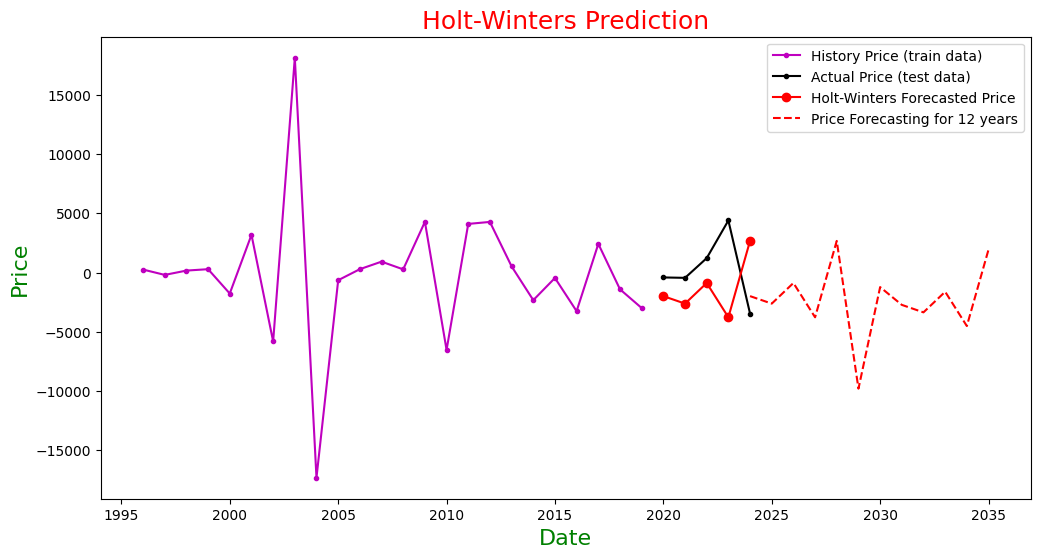

In [295]:
# Displaying of forecasted price.

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Making train, test, Holt-Winters, and forecasting plots.
plt.plot(train_data.index, train_data, 'm.-',
         label='History Price (train data)')

plt.plot(test_data.index, test_data, 'k.-',
         label='Actual Price (test data)')

plt.plot(test_data.index, hw_model_prediction, 'ro-',
         label='Holt-Winters Forecasted Price')

plt.plot(forecast_index_HolWin, forecast_HolWin, 'r--',
         label='Price Forecasting for 12 years')

plt.xlabel('Date', fontsize=16, color='green')
plt.ylabel('Price', fontsize=16, color='green')
plt.legend(loc='best')
plt.title('Holt-Winters Prediction', fontsize=18, color='red')
plt.show()

### <center><font color='slategray'>**9.1. Metrics of Holt-Winters Algorithm**</font></center>

In [296]:
# Holt Winters evaluation.
mape_hw = mean_absolute_percentage_error(test_data, hw_model_prediction)
mae_hw = mean_absolute_error(test_data, hw_model_prediction)
mse_hw = mean_squared_error(test_data, hw_model_prediction)
rmse_hw = np.sqrt(mse_hw)
aic_hw = hw_model.aic
bic_hw = hw_model.bic

print('-- Metrics of Holt Winters Algorithm --\n')

print(f"Mean Absolute Percentage Error (MAPE): {mape_hw:.2f}")
print(f"Mean Absolute Error (MAE): {mae_hw:.2f}")
print(f"Mean Squared Error (MSE): {mse_hw:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_hw:.2f}")
print(f'Akaike Information Criterion (AIC): {aic_hw}')
print(f'Bayesian Information Criterion (BIC): {bic_hw}')

-- Metrics of Holt Winters Algorithm --

Mean Absolute Percentage Error (MAPE): 2.80
Mean Absolute Error (MAE): 4032.15
Mean Squared Error (MSE): 23213500.37
Root Mean Squared Error (RMSE): 4818.04
Akaike Information Criterion (AIC): 437.13679837922524
Bayesian Information Criterion (BIC): 450.0953905130526


## <center><font color='slategray'>**10. SARIMAX Algorithm**</font></center>

<font  size='4'><font color='blue'>First of all I will find optimal hyperparameters for SARIMAX Algorithm by **auto-arima** function.</font>  
<font  size='4'><font color='blue'>**I have to find**:

1. p - Autoregressive order.
2. d - Integration order.
3. q - Moving average order.
4. P - Seasonal autoregressive order.
5. D - Seasonal differencing order.
6. Q - Seasonal moving average order.
7. s - Number of time steps per cycle.</font>   

### <center><font color='slategray'>**10.1. Finding the optimum parameters with Auto_arima**</font></center>

In [297]:
# Searching the best parameters.
auto_arima_SRMX = auto_arima(train_data,
                           start_p=1, #initial guess for p
                           d=None, #None - allows the function to automatically
                                #determine the appropriate value.
                           start_q=1, #initial guess for q
                           test='adf', #use adftest to find optimal 'd'
                           max_p=3, #max value of p to test
                           max_q=3, #max value of q to test
                           m=12, #frequency of series
                           start_P=1, #initial guess for P
                           start_Q=1, #initial guess for Q
                           max_P=2, #max value of P to test
                           max_Q=2, #max value of Q to test
                           D=1, #seasonal difference order
                           information_criterion='aic', #used to select best model
                           seasonal=True, #is the time series seasonal
                           trace=True, #print results whilst training
                           error_action='ignore', #ignore orders that don't work
                           suppress_warnings=True, #suppress any warning messages
                           stepwise=True) #apply intelligent order search

# Output the best parameters.
print(auto_arima_SRMX.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=209.735, Time=0.71 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=234.795, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=225.465, Time=0.08 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(1,2,1)(2,1,1)[12]             : AIC=inf, Time=4.36 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=211.938, Time=1.24 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=224.020, Time=0.35 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(1,2,1)(2,1,2)[12]             : AIC=227.051, Time=0.76 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=225.734, Time=0.14 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(2,2,1)(1,1,1)[12]             : AIC=inf, Time=0.73 sec

<font  size='4'><font color='blue'>I tried to find by auto-arima the best parameters for building SARIMAX model,    
but my few attempts didn't give me any good result.    
I checked it again and again by my SARIMAX model, but all the attempts were bad.
<font  size='4'>    
<font color='red'>So for SARIMAX I chose parameters at random.</font>

### <center><font color='slategray'>**10.2. Training SARIMAX model**</font></center>

In [298]:
# SARIMAX hyperparameters that were chosen at random.
p = 3
d = 2
q = 0
P = 1
D = 0
Q = 0
s = 12

# Fit the SARIMAX model.
sarimax_model = sm.tsa.SARIMAX(train_data, order=(p, d, q),
                              seasonal_order=(P, D, Q, s)).fit()

# Summary model table.
print(sarimax_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  transformed_price   No. Observations:                   24
Model:             SARIMAX(3, 2, 0)x(1, 0, 0, 12)   Log Likelihood                -229.039
Date:                            Wed, 08 Nov 2023   AIC                            468.078
Time:                                    14:11:43   BIC                            473.533
Sample:                                12-31-1995   HQIC                           469.363
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6710      0.188     -8.901      0.000      -2.039      -1.303
ar.L2         -1.3667      0.372   

<font  size='4'><font color='red'>Let's check it out below with **plot_diagnostics method**,
<br>which generates four common plots for evaluating the Sarimax model.</font>

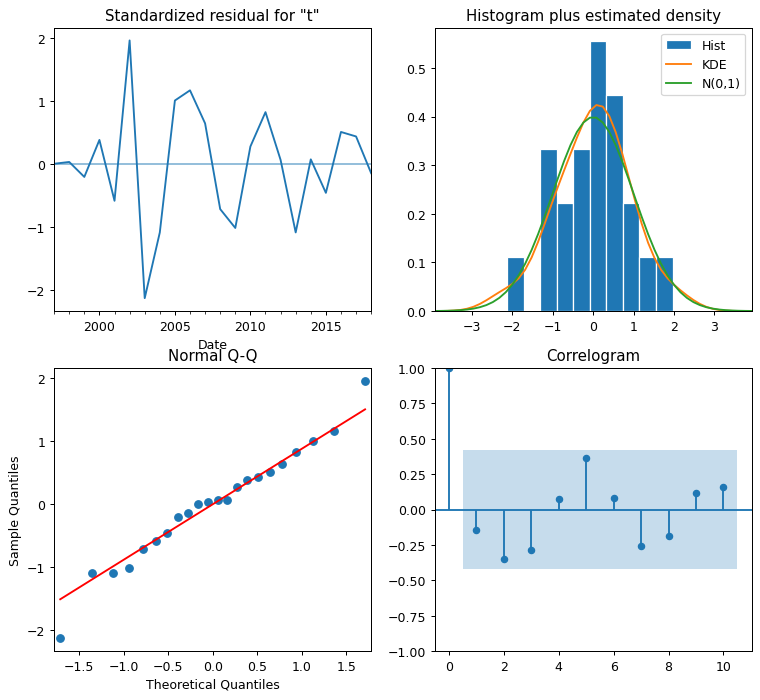

In [301]:
# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':90})

# Displaying of evaluating plots.
sarimax_model.plot_diagnostics(figsize=(10,9))
plt.show()

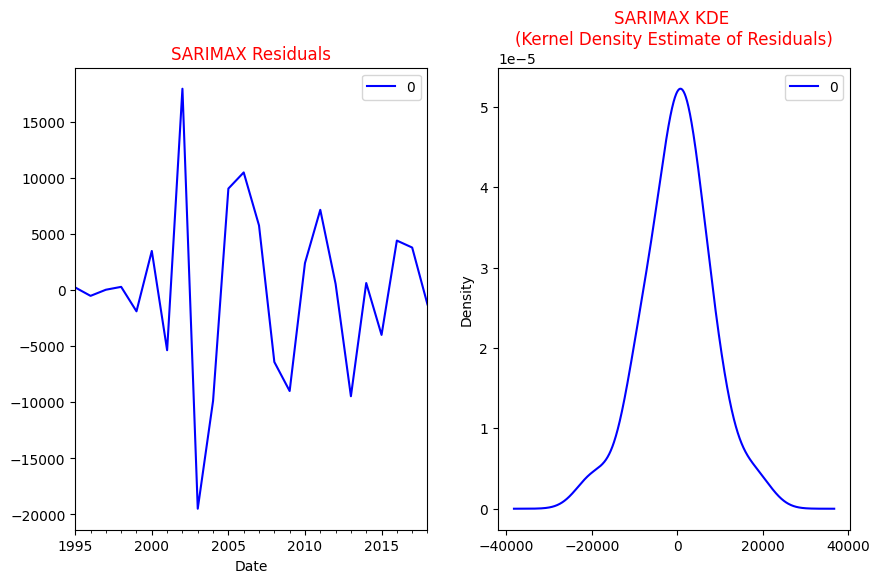

In [302]:
# Get residuals.
residuals_sarimax = pd.DataFrame(sarimax_model.resid)

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Displaying of residuals.
fig, ax = plt.subplots(1,2, figsize=(10,6))
residuals_sarimax.plot(title='SARIMAX Residuals', ax=ax[0], color='blue')
residuals_sarimax.plot(kind='kde',
                       title='SARIMAX KDE \n(Kernel Density Estimate of Residuals)',
                       ax=ax[1], color='blue')
ax[0].title.set_color('red')
ax[1].title.set_color('red')

plt.show()

In [303]:
# Differences between the actual values (test_data)
# and predicted values (sarimax_prediction).

print('The residuals data:\n')
print(residuals_sarimax)

The residuals data:

                       0
Date                    
1995-12-31    250.504490
1996-12-31   -498.034556
1997-12-31     48.474095
1998-12-31    305.525266
1999-12-31  -1877.604793
2000-12-31   3508.952977
2001-12-31  -5346.935113
2002-12-31  17980.458122
2003-12-31 -19486.691834
2004-12-31  -9865.318257
2005-12-31   9073.110439
2006-12-31  10513.544730
2007-12-31   5782.025530
2008-12-31  -6394.694810
2009-12-31  -8987.342725
2010-12-31   2425.380689
2011-12-31   7176.159107
2012-12-31    574.308766
2013-12-31  -9451.788583
2014-12-31    647.628036
2015-12-31  -3981.189688
2016-12-31   4434.351238
2017-12-31   3812.497264
2018-12-31  -1265.119118


In [304]:
print('-- Residuals mean --\n')
print(round(residuals_sarimax.mean(), 3))

-- Residuals mean --

0   -25.908
dtype: float64


In [305]:
# Get prediction.
sarimax_prediction = sarimax_model.forecast(len(test_data))

print('The predicted data by SARIMAX:\n')
sarimax_prediction

The predicted data by SARIMAX:



2019-12-31   -2213.377088
2020-12-31    -852.538736
2021-12-31   -2111.363728
2022-12-31   -1868.212108
2023-12-31   -3362.711185
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [306]:
# Adjust the forecast period for 12 years.
forecast_periods = 12
forecast_index_sarimax = pd.date_range(test_data.index[-1],
                                       periods=forecast_periods, freq='Y')
forecast_sarimax = sarimax_model.forecast(steps=forecast_periods)
forecast_sarimax

2019-12-31   -2213.377088
2020-12-31    -852.538736
2021-12-31   -2111.363728
2022-12-31   -1868.212108
2023-12-31   -3362.711185
2024-12-31   -2340.286330
2025-12-31   -1533.311673
2026-12-31   -1191.914085
2027-12-31   -1920.056069
2028-12-31   -2540.814766
2029-12-31   -1919.959098
2030-12-31   -1406.799583
Freq: A-DEC, Name: predicted_mean, dtype: float64

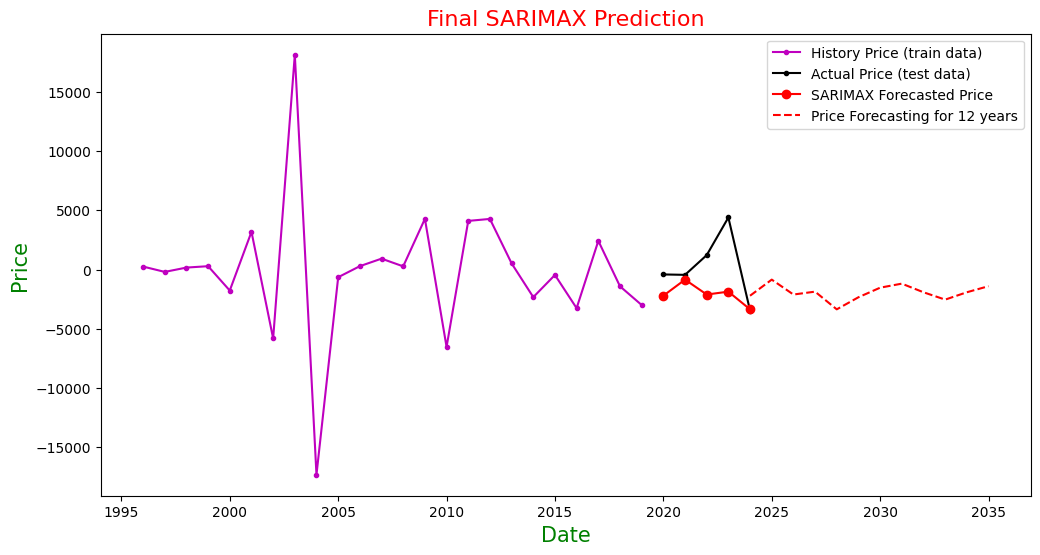

In [307]:
# Displaying of forecasted price.

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Making train, test, Sarimax, and forecasting plots.
plt.plot(train_data.index, train_data, 'm.-',
         label='History Price (train data)')

plt.plot(test_data.index, test_data, 'k.-',
         label='Actual Price (test data)')

plt.plot(test_data.index, sarimax_prediction, 'ro-',
         label='SARIMAX Forecasted Price')

plt.plot(forecast_index_sarimax, forecast_sarimax, 'r--',
         label='Price Forecasting for 12 years')

plt.xlabel('Date', fontsize=15, color='green')
plt.ylabel('Price', fontsize=15, color='green')
plt.title('Final SARIMAX Prediction', fontsize=16, color='red')

plt.legend()
plt.show()

### <center><font color='slategray'>**10.3. Metrics of SARIMAX model**</font></center>

In [308]:
# SARIMAX evaluation.
mape_sarmx = mean_absolute_percentage_error(test_data, sarimax_prediction)
mae_sarmx = mean_absolute_error(test_data, sarimax_prediction)
mse_sarmx = mean_squared_error(test_data, sarimax_prediction)
rmse_sarmx = np.sqrt(mse_sarmx)
aic_sarmx = sarimax_model.aic
bic_sarmx = sarimax_model.bic


# Print the metrics.
print('-- Metrics of SARIMAX model --\n')
print(f"Mean Absolute Percentage Error (MAPE): {mape_sarmx:.2f}")
print(f"Mean Absolute Error (MAE): {mae_sarmx:.2f}")
print(f"Mean Squared Error (MSE): {mse_sarmx:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarmx:.2f}")
print(f'Akaike Information Criterion (AIC): {aic_sarmx}')
print(f'Bayesian Information Criterion (BIC): {bic_sarmx}')

-- Metrics of SARIMAX model --

Mean Absolute Percentage Error (MAPE): 1.88
Mean Absolute Error (MAE): 2378.22
Mean Squared Error (MSE): 10739990.25
Root Mean Squared Error (RMSE): 3277.19
Akaike Information Criterion (AIC): 468.0782746696632
Bayesian Information Criterion (BIC): 473.5334869364548


## <center><font color='slategray'>**11. ARIMA Algorithm**</font></center>

### <center><font color='slategray'>**11.1. Finding the optimum parameters with Auto_arima**</font></center>

In [309]:
# Searching the best parameters.
auto_arima_AR = auto_arima(train_data,
                           start_p=1,
                           d=2,
                           start_q=1,
                           test='adf',
                           max_p=3,
                           max_q=3,
                           m=7,
                           start_P=0,
                           D=1,
                           seasonal=True,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(auto_arima_AR.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[7]             : AIC=329.929, Time=0.07 sec
 ARIMA(0,2,0)(0,1,0)[7]             : AIC=359.314, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[7]             : AIC=337.334, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(1,2,1)(0,1,0)[7]             : AIC=333.430, Time=0.07 sec
 ARIMA(1,2,1)(1,1,1)[7]             : AIC=inf, Time=0.49 sec
 ARIMA(1,2,1)(0,1,2)[7]             : AIC=330.576, Time=0.12 sec
 ARIMA(1,2,1)(1,1,0)[7]             : AIC=329.344, Time=0.09 sec
 ARIMA(1,2,1)(2,1,0)[7]             : AIC=330.497, Time=0.15 sec
 ARIMA(1,2,1)(2,1,1)[7]             : AIC=309.096, Time=0.62 sec
 ARIMA(1,2,1)(2,1,2)[7]             : AIC=334.434, Time=0.33 sec
 ARIMA(1,2,1)(1,1,2)[7]             : AIC=332.439, Time=0.18 sec
 ARIMA(0,2,1)(2,1,1)[7]             : AIC=341.867, Time=0.16 sec
 ARIMA(1,2,0)(2,1,1)[7]             : AIC=340.103, Time=0.14 sec
 ARIMA(2,2,1)(2,1,1)[7]             : AIC=333.950, Time

<font  size='4'><font color='blue'>The same bad result I got for ARIMA model by auto-arima<font  size='4'>    

<font  size='4'><font color='blue'>And For ARIMA model I need to use only three parameters:

*   p - Autoregressive order;
*   d - Integration order;
*   q - Moving average order.</font>    
<font  size='4'><font color='red'>These parameters for ARIMA I also chose at random, without auto-arima.</font>

### <center><font color='slategray'>**11.2. Training ARIMA model**</font></center>

In [310]:
# Defined the hyperparameters for the ARIMA model.
p = 5
d = 1
q = 0

# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(train_data, order=(p, d, q)).fit()

# Print the summary of the ARIMA model.
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:      transformed_price   No. Observations:                   24
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -228.616
Date:                Wed, 08 Nov 2023   AIC                            469.231
Time:                        14:14:22   BIC                            476.044
Sample:                    12-31-1995   HQIC                           470.944
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4883      0.226     -6.591      0.000      -1.931      -1.046
ar.L2         -1.4257      0.470     -3.033      0.002      -2.347      -0.504
ar.L3         -1.1804      0.761     -1.551      0.1

<font  size='4'><font color='red'>Let's check it out below with **plot_diagnostics method**,
<br>which generates four common plots for evaluating the arima model.</font>

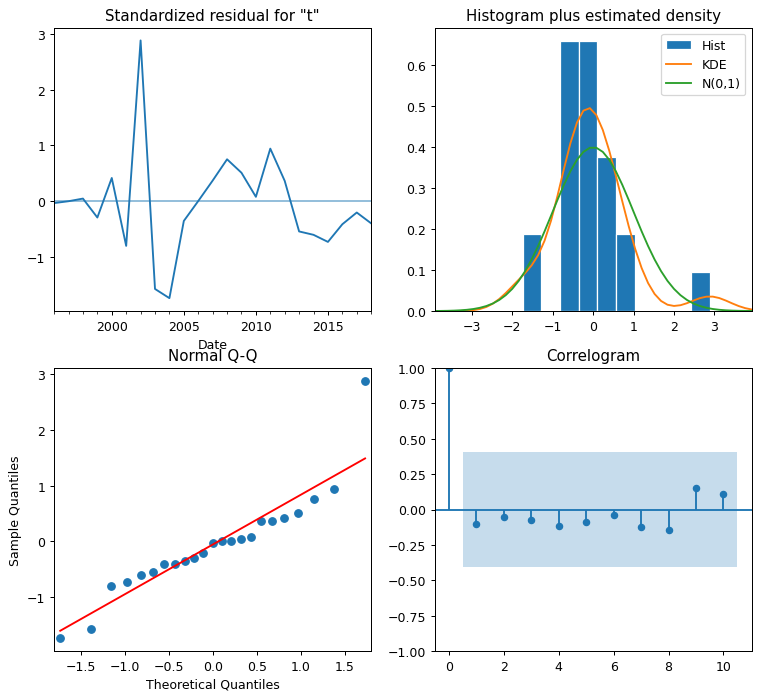

In [311]:
# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':90})

# Displaying of evaluating plots.
arima_model.plot_diagnostics(figsize=(10,9))
plt.show()

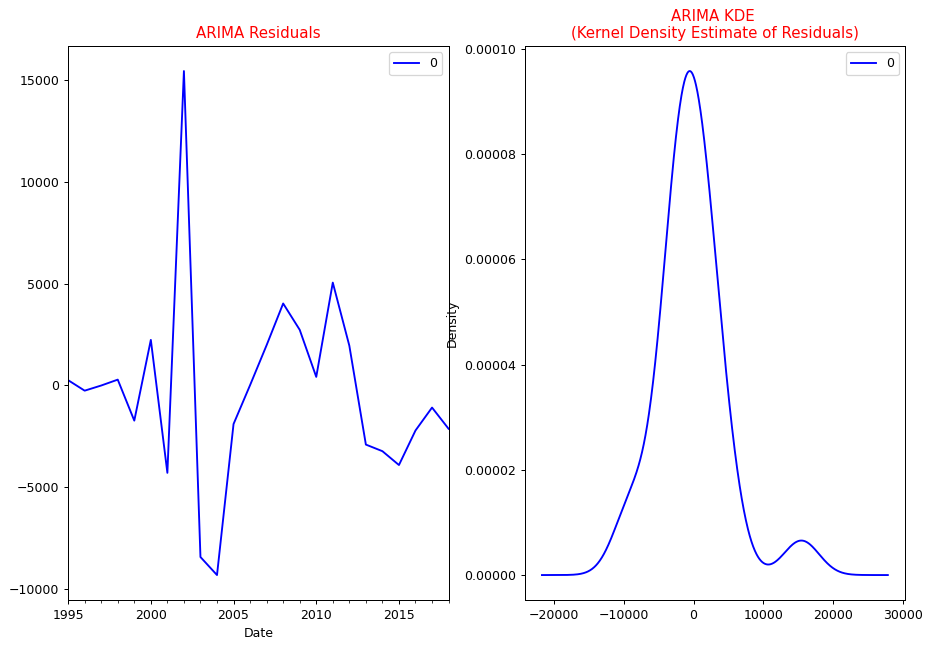

In [312]:
# Get residuals.
residuals_arima = pd.DataFrame(arima_model.resid)

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':90})

# Displaying of residuals.
fig, ax = plt.subplots(1,2, figsize=(12,8))
residuals_arima.plot(title='ARIMA Residuals', ax=ax[0], color='blue')
residuals_arima.plot(kind='kde',
                     title='ARIMA KDE \n(Kernel Density Estimate of Residuals)',
                     ax=ax[1], color='blue')
ax[0].title.set_color('red')
ax[1].title.set_color('red')

plt.show()

In [313]:
print(residuals_arima)

                       0
Date                    
1995-12-31    250.504490
1996-12-31   -265.517688
1997-12-31    -12.150614
1998-12-31    277.095934
1999-12-31  -1738.766092
2000-12-31   2232.177146
2001-12-31  -4305.865444
2002-12-31  15450.349146
2003-12-31  -8445.578198
2004-12-31  -9331.804762
2005-12-31  -1906.812068
2006-12-31      6.836996
2007-12-31   1972.627996
2008-12-31   4021.269367
2009-12-31   2726.997029
2010-12-31    412.172964
2011-12-31   5048.206954
2012-12-31   1946.693331
2013-12-31  -2916.387446
2014-12-31  -3241.231377
2015-12-31  -3922.130371
2016-12-31  -2223.021155
2017-12-31  -1096.212080
2018-12-31  -2139.380004


In [314]:
print('-- Residuals mean --\n')
print(round(residuals_arima.mean(), 3))

-- Residuals mean --

0   -299.997
dtype: float64


In [315]:
# Get forecast.
arima_prediction = arima_model.forecast(len(test_data))
arima_prediction

2019-12-31    -346.098380
2020-12-31   -1042.364969
2021-12-31   -1121.572571
2022-12-31    -227.649087
2023-12-31   -2157.219933
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [317]:
# Adjust the forecast period for 12 years
forecast_periods = 12
forecast_index_arima = pd.date_range(test_data.index[-1],
                                     periods=forecast_periods, freq='Y')
forecast_arima = arima_model.forecast(steps=forecast_periods)
forecast_arima

2019-12-31    -346.098380
2020-12-31   -1042.364969
2021-12-31   -1121.572571
2022-12-31    -227.649087
2023-12-31   -2157.219933
2024-12-31    -998.855474
2025-12-31    -670.264185
2026-12-31   -1240.069728
2027-12-31   -1004.299820
2028-12-31   -1082.504408
2029-12-31   -1386.245046
2030-12-31    -766.720348
Freq: A-DEC, Name: predicted_mean, dtype: float64

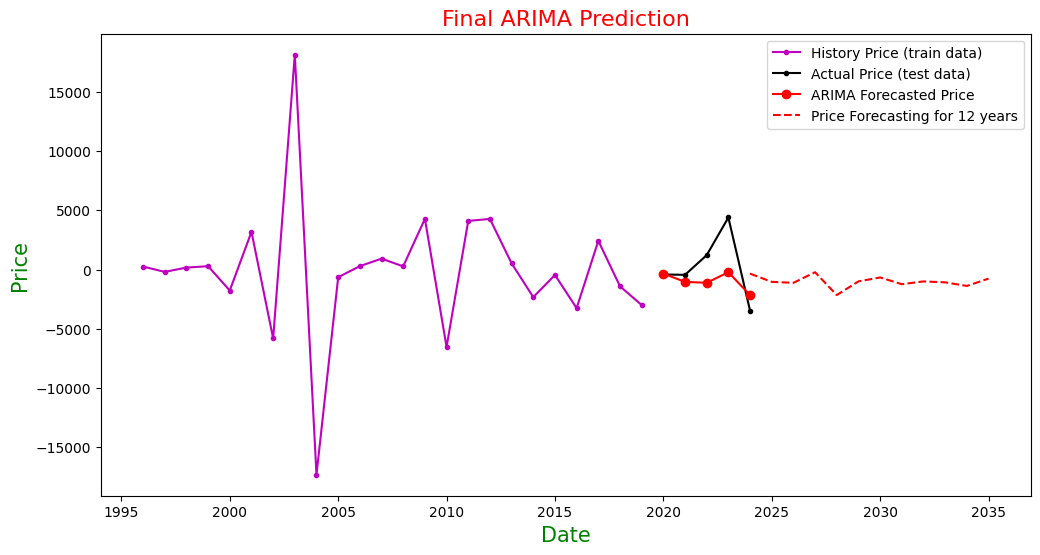

In [318]:
# Displaying of forecasted price.

# Plot size.
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Making train, test, Arima, and forecasting plots.
plt.plot(train_data.index, train_data, 'm.-',
         label='History Price (train data)')

plt.plot(test_data.index, test_data, 'k.-',
         label='Actual Price (test data)')

plt.plot(test_data.index, arima_prediction, 'ro-',
         label='ARIMA Forecasted Price')

plt.plot(forecast_index_arima, forecast_arima, 'r--',
         label='Price Forecasting for 12 years')

plt.xlabel('Date', fontsize=15, color='green')
plt.ylabel('Price', fontsize=15, color='green')
plt.title('Final ARIMA Prediction', fontsize=16, color='red')

plt.legend()
plt.show()

### <center><font color='slategray'>**11.3. Metrics of ARIMA model**</font></center>

In [319]:
# ARIMA evaluation.
mape_arima = mean_absolute_percentage_error(test_data, arima_prediction)
mae_arima = mean_absolute_error(test_data, arima_prediction)
mse_arima= mean_squared_error(test_data, arima_prediction)
rmse_arima = np.sqrt(mse_arima)
aic_arima = arima_model.aic
bic_arima = arima_model.bic


# Print the metrics.
print('-- Metrics of ARIMA model --\n')
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima:.2f}")
print(f"Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"Mean Squared Error (MSE): {mse_arima:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima:.2f}")
print(f'Akaike Information Criterion (AIC): {aic_arima}')
print(f'Bayesian Information Criterion (BIC): {bic_arima}')

-- Metrics of ARIMA model --

Mean Absolute Percentage Error (MAPE): 0.97
Mean Absolute Error (MAE): 1785.29
Mean Squared Error (MSE): 5777521.08
Root Mean Squared Error (RMSE): 2403.65
Akaike Information Criterion (AIC): 469.23104145970916
Bayesian Information Criterion (BIC): 476.04400675528404


## <center><font color='slategray'><b>12. Comparison: ARIMA vs SARIMAX vs Holt-Winters</b></font></center>

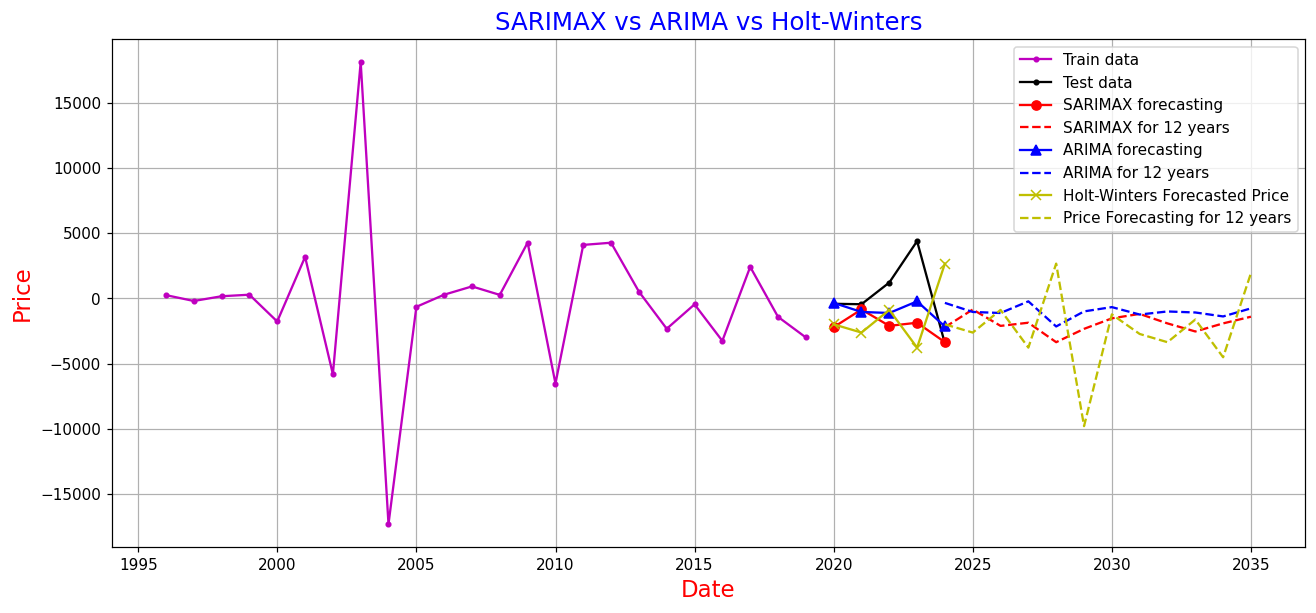

In [320]:
# Plot size.
plt.rcParams.update({'figure.figsize':(14,6), 'figure.dpi':110})

# Making plots.
plt.plot(train_data.index, train_data, 'm.-',
         label='Train data')
plt.plot(test_data.index, test_data, 'k.-',
         label='Test data')

plt.plot(test_data.index, sarimax_prediction, 'ro-',
         label='SARIMAX forecasting')
plt.plot(forecast_index_sarimax, forecast_sarimax, 'r--',
         label='SARIMAX for 12 years')

plt.plot(test_data.index, arima_prediction, 'b^-',
         label='ARIMA forecasting')
plt.plot(forecast_index_arima, forecast_arima, 'b--',
         label='ARIMA for 12 years')

plt.plot(test_data.index, hw_model_prediction, 'yx-',
         label='Holt-Winters Forecasted Price')
plt.plot(forecast_index_HolWin, forecast_HolWin, 'y--',
         label='Price Forecasting for 12 years')


# Show the legend.
plt.legend()

plt.xlabel('Date', fontsize=15, color='red')
plt.ylabel('Price', fontsize=15, color='red')
plt.title('SARIMAX vs ARIMA vs Holt-Winters',
          fontsize=16, color='blue')
plt.grid(True)
plt.show()

In [321]:
# Initialize data for ARIMA.
data_arima = {'ARIMA': [f'{mape_arima:.3f}',
                       f'{mae_arima:.3f}',
                       f'{mse_arima:.3f}',
                       f'{rmse_arima:.3f}',
                       f'{aic_arima:.3f}',
                       f'{bic_arima:.3f}']}

# Initialize data for SARIMAX.
data_sarimax = {'SARIMAX': [f'{mape_sarmx:.3f}',
                           f'{mae_sarmx:.3f}',
                           f'{mse_sarmx:.3f}',
                           f'{rmse_sarmx:.3f}',
                           f'{aic_sarmx:.3f}',
                           f'{bic_sarmx:.3f}']}

# Initialize data for Holt-Winters.
data_hw = {'Holt-Winters': [f'{mape_hw:.3f}',
                           f'{mae_hw:.3f}',
                           f'{mse_hw:.3f}',
                           f'{rmse_hw:.3f}',
                           f'{aic_hw:.3f}',
                           f'{bic_hw:.3f}']}

# Create ARIMA DataFrames.
compare_arima = pd.DataFrame(data_arima,
                                index=['MAPE', 'MAE', 'MSE',
                                       'RMSE', 'AIC', 'BIC'])

# Create SARIMAX DataFrames.
compare_sarimax = pd.DataFrame(data_sarimax,
                                  index=['MAPE', 'MAE', 'MSE',
                                         'RMSE', 'AIC', 'BIC'])

# Create Holt_Winters DataFrames.
compare_hw = pd.DataFrame(data_hw,
                                  index=['MAPE', 'MAE', 'MSE',
                                         'RMSE', 'AIC', 'BIC'])

# Concatenate the DataFrames.
df_compare = pd.concat([compare_arima, compare_sarimax, compare_hw], axis=1)

print('--- Comparison of the best models ---')
df_compare

--- Comparison of the best models ---


,ARIMA,SARIMAX,Holt-Winters
MAPE,0.968,1.885,2.801
MAE,1785.292,2378.222,4032.150
MSE,5777521.076,10739990.254,23213500.369
RMSE,2403.647,3277.192,4818.039
AIC,469.231,468.078,437.137
BIC,476.044,473.533,450.095


<font  size='4'><font color='blue'>According to the above indicators, ARIMA model shows a better result.</font>


## <center><font color='slategray'>**13. Saving ARIMA model**</font></center>

In [322]:
# Select a filepath.
filepath = 'arima_model.pkl'

# Save model to filepath.
joblib.dump(arima_model, filepath)

# Load the model:
# Select a filepath.
filepath ='arima_model.pkl'

# Load model object from filepath
loaded_model = joblib.load(filepath)